In [1]:
import os
import sys
#SERVE PER POTER IMPORTARE I FILE .PY DALLA CARTELLA SOURCE
sys.path.append('..')
sys.path.append('..\data')

# importo i miei script dal package src
from src.data_load_notebook  import *
#import pandas as pd|
# ||||||||||è un utilizzo un pò improprio di import, basta ricordare che così importiamo pandas
from src.classes import Spettri,plot_peaks, plot_spettri, plot_database_peaks
from src import funzioni
from src import cluster_routine
import numpy as np

from numpy.random import choice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pass

## Database

Utilizzo una routine diversa dai campioni, per la diversità di come arrivano i dati 8 e perchè è un processo da svolgersi su questo database e basta.

Nel modulo data_load_... esiste una variabile chiamata database con un dizionario con key = nome materiale e value = dataf due colonne con numero d onda ed intensità


In [2]:
#routine per estrarre i picchi e le feature dai csampioni
pk1 = Spettri(data1)
pk1bkg = Spettri(data1bkg)
pk1.peakfinder()
pk1bkg.peakfinder()
pk1.featextract()
pk1bkg.featextract()
pk1.featextract2()
pk1bkg.featextract2()
pass

### Funzioni in funzioni.

Sono simili ad i metodi applicati alla classe spettri
- **seriepeak**: per la singola serie (singolo ingresso di database)
- **peakfinder** : wrapper per seriepeak
- **featextract1_df** : per l'estrazione delle feature direttamente dal risultato di peakfinder
- **featextract1** : alternativa alla precedente da utilizzare con una lista di picchi passando a parte il valore delle chiavi (nomi dei materiali)


come funzione peakfinder bene o male
crea un dizionario con key-val nome materiale_dataframepicchi_raw dalla variabile DATABASE

    dtbase_peaks = dict()
    for key,val in database.items():
        funzioni.normalizer(val['H'],val['K'])
         dtbase_peaks[key] = funzioni.seriepeak(val['H'],prop={'prominence':(None,None), 'height': (None,None), 'width':(None),'wlen':50})
    dtbase_peaks[key]['K']= val.loc[dtbase_peaks[key]['peak_ind_H'],'K'].values
    dtbase_peaks[key].drop('peak_ind_H', axis = 1, inplace = True)

In [3]:
picchidf = funzioni.peakfinder(database)
database_feat1 = funzioni.featextract1_df(picchidf)
database_feat2 = funzioni.featextract2_df(picchidf)

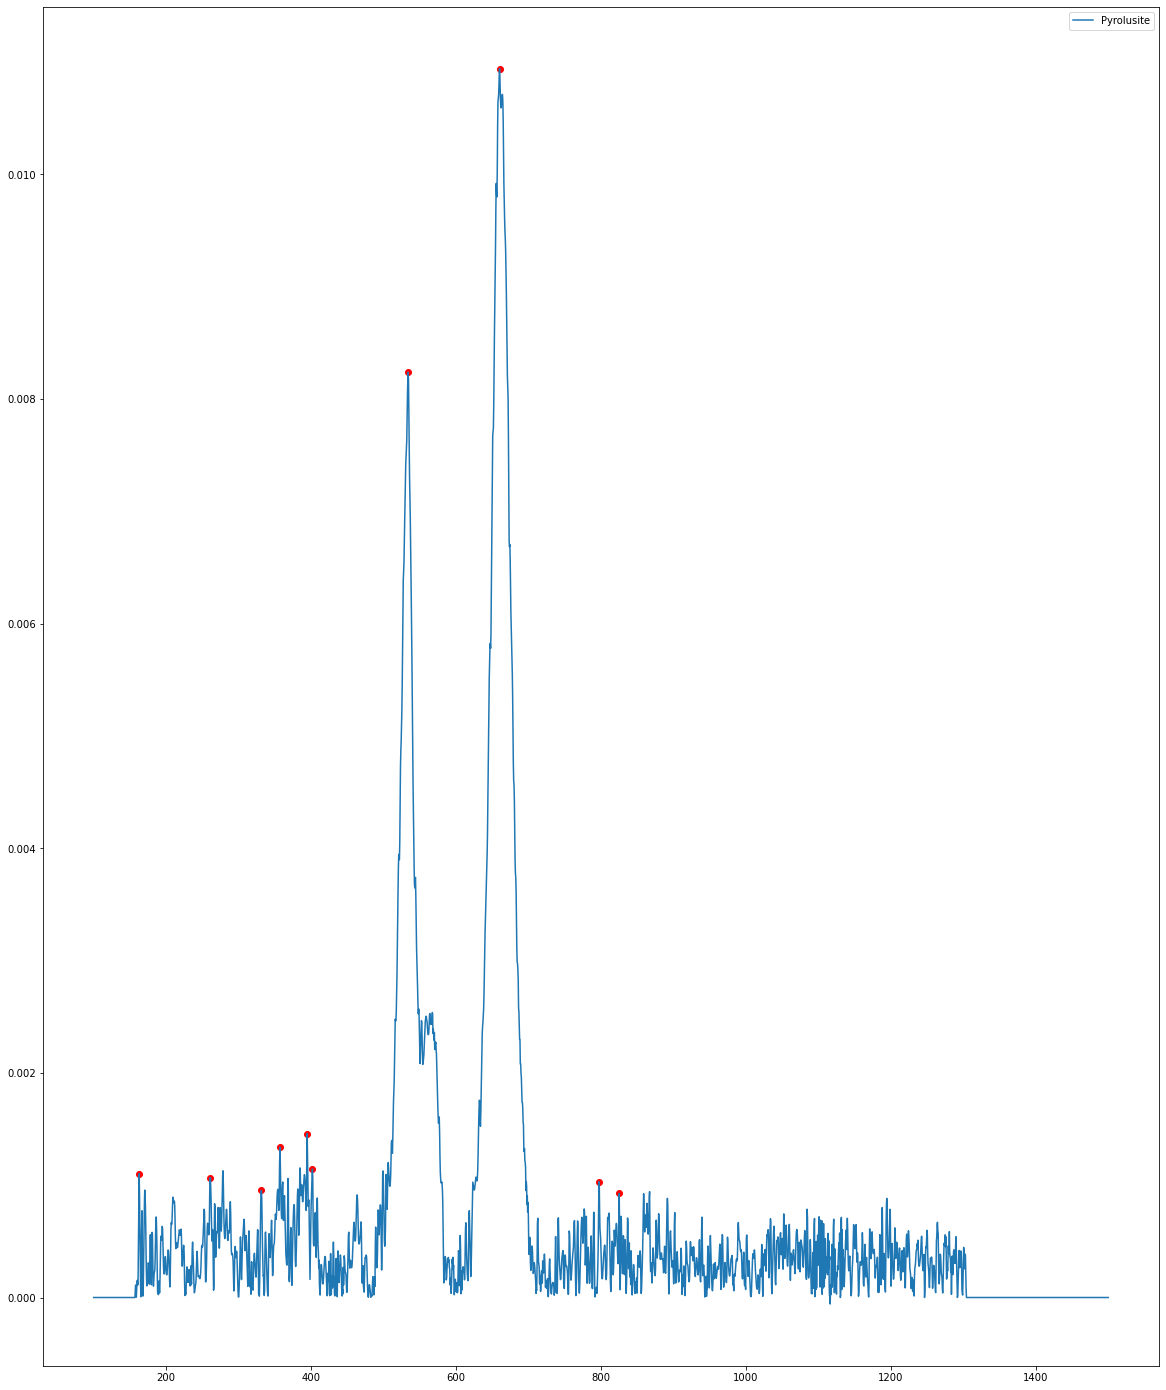

In [4]:
plot_database_peaks(database,picchidf, keys = ['Pyrolusite'])

In [5]:
from scipy.spatial.distance import pdist
import numpy as np
np.mean(pdist(database_feat2))


1395.99579607754

In [6]:
np.mean(pdist(pk1.feature2))

2044.4657643756575

In [7]:
np.std(pdist(pk1.feature2))

745.8486963685674

In [8]:
np.std(pdist(database_feat2))

312.1940674826203

In [9]:
np.mean(pdist(database_feat2))

1395.99579607754

In [10]:
np.std(pdist(database_feat2))

312.1940674826203